<center><font size="+2"><b><u>Random Forest</u></b> </font></center>


<b><u> Réalisé par :</u></b> Menacer Nasreddine


In [ ]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn import tree, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
import pandas as pd
from sklearn import datasets,tree
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV

In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline  
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn import datasets,tree
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from time import time
from scipy.stats import randint as sp_randint

In [5]:
digits = datasets.load_digits()
temp = digits['images']
y = digits['target']

Flatten des données

In [6]:
X = np.zeros( shape = (temp.shape[0], 64))
for i in range(temp.shape[0]):
    X[i] = temp[i].flatten()

Dévision des données en ensembles d'entrainement, de teste, et de validation

In [7]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.4) 
X_dev, X_test, y_dev, y_test = train_test_split(X_test,y_test, test_size = 0.2)

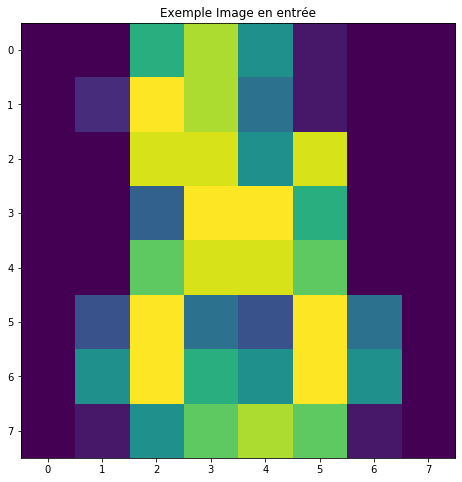

In [9]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,8))
plt.title('Exemple Image en entrée')
plt.imshow(X[-1].reshape(8,8))
plt.show()

In [11]:
print("Image du digit : ", y[-1])

Image du digit :  8


# Experiment 0

- Measure the accuracy of a single decision tree with a 5-fold cross-validation procedure and print the result as the mean accuracy over the 5 runs along with the standard deviation

- Création de l'arbre de décision 

In [14]:
singleTreeDecisional = tree.DecisionTreeClassifier()

- Entrainement de l'arbre de décision 

In [13]:
singleTreeDecisional.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

- mesure de performance en 5-fold cross validation 

In [20]:
cv = cross_val_score(singleTreeDecisional,X_test,y_test,cv=5)

print("Accuracy moyenne : %.2f" % cv.mean())
print("Standard deviation : %.2f" % cv.std())

Accuracy moyenne : 0.62
Standard deviation : 0.03


- Repeat the same experiment with a Bagged Forest, i.e. an ensemble of decision trees built with the Bagging principle (cf. BaggingClassifier in Scikit-learn). For now, use the default parametrization.


In [21]:
# création du modèle avec les paramètres par défaut
bag_model = BaggingClassifier()
# entrainment du modèle
bag_model.fit(X_train,y_train)
# mesure de performance en 5-fold cross validation 
cv = cross_val_score(bag_model,X_test,y_test,cv=5)

print("Accuracy moyenne : %.2f" % cv.mean())
print("Standard deviation : %.2f" % cv.std())

Accuracy moyenne : 0.77
Standard deviation : 0.02


- Repeat the same experiment with a Random Forest (cf. RandomForestClassifier in Scikit-learn), with default parametrization too.

In [22]:
# création du modèle avec les paramètres par défaut
rf_model = RandomForestClassifier()
# entrainment du modèle
rf_model.fit(X_train,y_train)
# mesure de performance en 5-fold cross validation 
cv = cross_val_score(rf_model,X_test,y_test,cv=5)

print("Moyenne : %.2f" % cv.mean())
print("Standard deviation : %.2f" % cv.std())

Moyenne : 0.90
Standard deviation : 0.06


- Re-run this comparison between the three methods (single decision tree, bagged forest and random forest), but with 50 trees for each of the forests.

In [23]:
bag_model = BaggingClassifier(base_estimator=singleTreeDecisional, n_estimators=50)
bag_model.fit(X_train,y_train)
cv = cross_val_score(bag_model,X_test,y_test,cv=5)

print("Moyenne : %.2f" % cv.mean())
print("Standard deviation : %.2f" % cv.std())

Moyenne : 0.83
Standard deviation : 0.06


In [24]:
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train,y_train)
cv = cross_val_score(rf_model,X_test,y_test,cv=5)

print("Moyenne : %.2f" % cv.mean())
print("Standard deviation : %.2f" % cv.std())

Moyenne : 0.90
Standard deviation : 0.06


- Analyze and comment the results.

Dans cette partie j'ai comparé un arbre de décision simple, avec des modèles d'arbres de décision (Bagging, Randomforest), et 

j'ai remarqué que les modeles qui font intervenir plusieurs arbres sont plus efficace qu'un seul arbre de décision.

la méthode du random forest semble la mieux adaptée à notre problème puisqu'elle fournit les meilleurs résultats.

j'ai ramarqué aussi que le nombre d'estimateurs a un impact sur la qualité du modèle (Bagging), puisque il fourni de meilleurs résulats l'orsque on utilise 50 arbres de décision.

# Experiment 1

In [25]:
#création du modèle
rf = RandomForestClassifier(random_state=1)

In [26]:
# results_rf est un dictionnaire qui contient trois liste  où je vais stocker les moyennes de la crossvalidation, 
# l'écart type, et la crossvalidation elle meme
results_rf = {'mean': [],'cv':[], 'std' : []}

In [27]:
# i_list est une liste où je vais stocker les variables i par pas de 2
i_list = []

In [28]:
for i in range(1,50,2):
    i_list.append(i)
    # changement du nombre d'estimateurs
    temp = {'n_estimators' : i}
    rf.set_params(**temp)
    
    # re-entrainement du modèle aprés changement du nombre d'estimateurs
    rf.fit(X_train,y_train)

    # mesure de performance en cross validation et stockage des résultats dans le dictionnaire
    cv = cross_val_score(rf,X,y,cv=5)
    results_rf['mean'].append(cv.mean())
    results_rf['cv'].append(cv)
    results_rf['std'].append(cv.std())

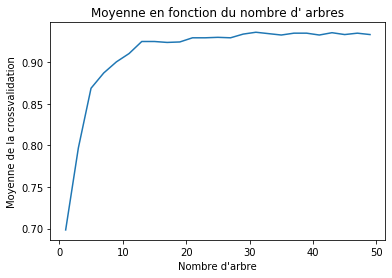

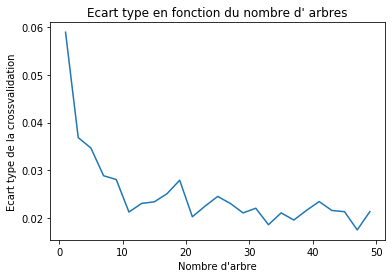

In [29]:
plt.plot(i_list,results_rf['mean'])
plt.xlabel("Nombre d'arbre")
plt.ylabel('Moyenne de la crossvalidation')
plt.title('Moyenne en fonction du nombre d\' arbres')
plt.show()

plt.plot(i_list,results_rf['std'])
plt.xlabel("Nombre d'arbre")
plt.ylabel('Ecart type de la crossvalidation')
plt.title('Ecart type en fonction du nombre d\' arbres')
plt.show()

On remarque que la moyenne de la cross validationn augmente exponentiellement, au fur et à mesure qu'on ajoute d'arbre, mais qui stagne au tour des 95%, à partir de 30 arabres et plus.

On remarque aussi que la courbe de l'écart type ne suis pas une distribution particulière, neaumoins elle tends à décroitre quand le nombre d'arbre augmente.

# Experiment 2

- Using the GridSearchCV function from Scikit-learn, compare the accuracies obtained with random forests learnt with each possible combination of the following hyperparemeter values:
- Minimum number of instances in the leaves: [0.1, 0.2, 0.3, 0.4, 0.5]
- Number of random features: [1, 8, 16, 32, 64]

Each forest will be composed of 50 random trees.

In [30]:
clf = RandomForestClassifier(n_estimators=50)

# Création de la grille de recherche 
param_grid ={'min_samples_leaf' : [0.1,0.2,0.3,0.4,0.5], 'max_features': [1,8,16,32,64]}


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
# Création de l'objet gridsearch
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

In [34]:
from time import time
# Calcule de temps d'exécution 
start = time()

#Entrainement 
grid_search.fit(X, y)

#On print le temps pris
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))


GridSearchCV took 12.02 seconds for 25 candidate parameter settings.


In [41]:
# Affichage des paramètres qui ont données les meilleurs résultats 
# Fonction prise de la documention Sklearn en ligne 
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Rang: {0}".format(i))
            print("La moyenne du score sur les données de validation: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parametres: {0}".format(results['params'][candidate]))
            print("")

report(grid_search.cv_results_,n_top=10)


Rang: 1
La moyenne du score sur les données de validation: 0.815 (std: 0.023)
Parametres: {'max_features': 8, 'min_samples_leaf': 0.1}

Rang: 2
La moyenne du score sur les données de validation: 0.765 (std: 0.022)
Parametres: {'max_features': 16, 'min_samples_leaf': 0.1}

Rang: 3
La moyenne du score sur les données de validation: 0.761 (std: 0.043)
Parametres: {'max_features': 1, 'min_samples_leaf': 0.1}

Rang: 4
La moyenne du score sur les données de validation: 0.724 (std: 0.064)
Parametres: {'max_features': 1, 'min_samples_leaf': 0.2}

Rang: 5
La moyenne du score sur les données de validation: 0.689 (std: 0.033)
Parametres: {'max_features': 32, 'min_samples_leaf': 0.1}

Rang: 6
La moyenne du score sur les données de validation: 0.687 (std: 0.052)
Parametres: {'max_features': 8, 'min_samples_leaf': 0.2}

Rang: 7
La moyenne du score sur les données de validation: 0.678 (std: 0.035)
Parametres: {'max_features': 16, 'min_samples_leaf': 0.2}

Rang: 8
La moyenne du score sur les données d

On remarque aprés cette experimentation que le modèle qui donne de meilleurs résultats a un k=8, cela signifie qu'on a peu de variable non significatives, mais cela n'est pas une vérité absolue, car on pris que les 10 meilleurs modèles, et dans ces 10 meilleurs, ce résultat n'apparait que 3 fois.

Par ailleurs un modèle apparait quand lui 4 fois, mais avec un k plus élevé, cela signifie qu'il a des variables insignifiantes, neaumoins, elles sont moins significatifs que d'autres.

On remarque aussi qu'une fraction (le nombre minimum de feuilles dans le modèle donné par le parametre min_simple_leaf), faible et aventagé, en effet dans le top 3 des meilleurs résultats, on retrouve une fraction, tandis qu'une portin avec 0.3% de l'échantiollon n'apparait qu'en 8 ème position 



# Experiment 3

In this experiment, you will implement and test the similarity measure embed in the
random forests. This measure is not available from the RandomForestClassifier
objects in Scikit-learn. Therefore you will have to define your own function that takes in
input:
◦ a trained random forest hRF
◦ its trainset, noted Dtrain
and that outputs a n × n similarity matrix P, n being the number of instances in Dtrain
and P[i, j], the value at the i
th row and j
th column of P, being the similarity between the
i
th and j
th instances of Dtrain.
To do so, you can use the apply method of RandomForestClassifier. To test whether
or not your implementation is correct, you can visualize few pairs of digits1 and verify if
the similarity measured is consistent with the resemblance between the images.

In [42]:
#On cherche maintenant à créer la matrice de similarité entre les données.
# définition de la foret 
clf = RandomForestClassifier(n_estimators=50)
# entrainer
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
# application de l'arbre entrainé sur les données de  test.
apply = clf.apply(X_test)

In [45]:
#Fonction de similarité. qui prend en entrée une foret aléatoire et un échantillon de données.
def similarity(clf,X):
    #On récupère les 50 arbres 
    apply = clf.apply(X)
    #Récupération de la taille de la foret 
    n,p = apply.shape
    # Initialisation de la matrice de similarité à 0 
    similarity = np.zeros((n,n))
    for i in range (n):
        for j in range (n): 
            d = 0
            for p in range (50):
                #Pour chaque couple i,j on effectue la somme de leur distance dans chaque arbre p.
                d += abs(apply[i][p] - apply[j][p])
            d = d/50
            similarity[i][j] = abs(d)
            similarity[j][i] = abs(d)
    return similarity

In [46]:
#application de la fonction sur les données d'entrainement et récupération de la matrice de similarité
temp = similarity(clf,X_train)

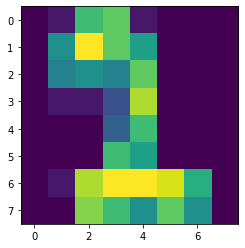

Cette image est un :  2


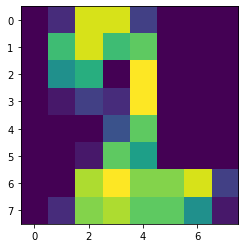

Cette image est un :  2


In [47]:
mini = 9999 

#On cherche ici à determiner le couple pour lequel il y a une similarité 
#la plus proche sans que ce soit la même image            


for i in range (temp.shape[0]):
    for j in range(temp.shape[1]):
        if not temp[i,j] == 0 and temp[i,j]< 1:
            mini = temp[i,j]
            si, sj = i,j
            
            
plt.imshow(X_train[si].reshape(8,8))
plt.show()
print("Cette image est un : ",y_train[si])

plt.imshow(X_train[sj].reshape(8,8))
plt.show()
print("Cette image est un : ",y_train[sj])

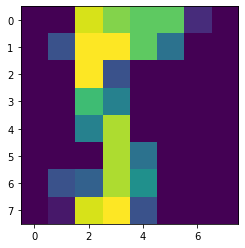

Cette image est un :  5


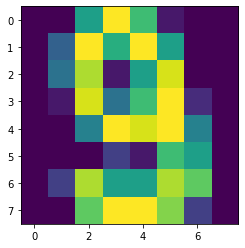

Cette image est un :  9


In [48]:
#On cherche ici à determiner le couple pour lequel il y a une similarité 
#la plus forte 

maxi = 0
for i in range (temp.shape[0]):
    for j in range(temp.shape[1]):
        if temp[i,j] > maxi:
            maxi = temp[i,j]
            si, sj = i,j


plt.imshow(X_train[si].reshape(8,8))
plt.show()
print("Cette image est un : ", y_train[si])

plt.imshow(X_train[sj].reshape(8,8))
plt.show()
print("Cette image est un : ",y_train[sj])



On remarque que les resultats sont satisfaisant, en effet  Les deux images supposées être proche représente toutes les deux des 0 , elle sont donc similaires. Par contre, les images supposées être distantes, sont bien différentes.

# Experiment 4

In [49]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2)

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.4) 
X_dev, X_test, y_dev, y_test = train_test_split(X_test,y_test, test_size = 0.2)

forest = RandomForestClassifier(n_estimators=50)
forest.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Feature ranking:
1. feature 17 (0.229330)
2. feature 15 (0.184877)
3. feature 5 (0.107893)
4. feature 1 (0.063871)
5. feature 4 (0.048188)
6. feature 10 (0.031422)
7. feature 8 (0.030657)
8. feature 16 (0.027089)
9. feature 12 (0.026456)
10. feature 13 (0.025158)
11. feature 7 (0.024565)
12. feature 11 (0.024244)
13. feature 6 (0.023934)
14. feature 3 (0.023701)
15. feature 9 (0.023321)
16. feature 18 (0.023010)
17. feature 0 (0.021666)
18. feature 14 (0.020431)
19. feature 2 (0.020192)
20. feature 19 (0.019996)


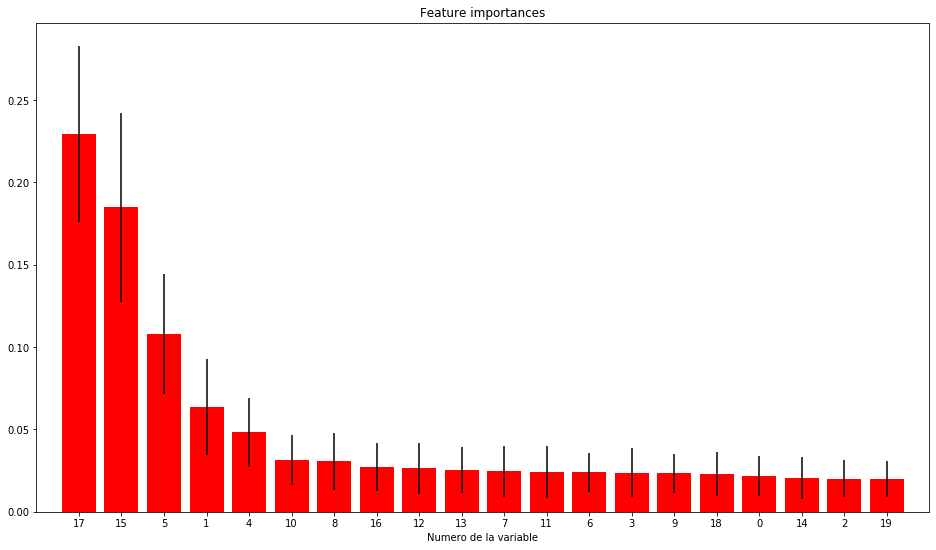

In [50]:
#je reprend une fonction définie par la documentation de sklearn.


def features_importance(forest): 
    #On récupere la mesure de l'importznce inclue dans la random forest
    importances = forest.feature_importances_
    #On calcule l'écart type de l'importance de la variable dans chaque arbre
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    #On trie les variables par ordre d'importance
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure(figsize=(16,9))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xlabel("Numero de la variable")
    plt.xticks(range(X.shape[1]), indices, rotation = 0)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
features_importance(forest)

On voit bien qu'on a 5 variables qui se démarquent des autres par leur importance dans le modèle. Donc la mesure semble consistante. On voit bien que l'écart type semble aussi proportionnel à l'importance de la variable.

Feature ranking:
1. feature 22 (0.201017)
2. feature 7 (0.132298)
3. feature 27 (0.124565)
4. feature 23 (0.105600)
5. feature 20 (0.078858)
6. feature 0 (0.057172)
7. feature 2 (0.054640)
8. feature 3 (0.045904)
9. feature 6 (0.031023)
10. feature 21 (0.025971)
11. feature 26 (0.025597)
12. feature 1 (0.016153)
13. feature 24 (0.012348)
14. feature 28 (0.010327)
15. feature 13 (0.008425)
16. feature 29 (0.007705)
17. feature 4 (0.007544)
18. feature 10 (0.007080)
19. feature 19 (0.005584)
20. feature 25 (0.005457)
21. feature 17 (0.004723)
22. feature 12 (0.004102)
23. feature 16 (0.004005)
24. feature 5 (0.003840)
25. feature 14 (0.003636)
26. feature 8 (0.003632)
27. feature 9 (0.003549)
28. feature 11 (0.003267)
29. feature 15 (0.003150)
30. feature 18 (0.002829)


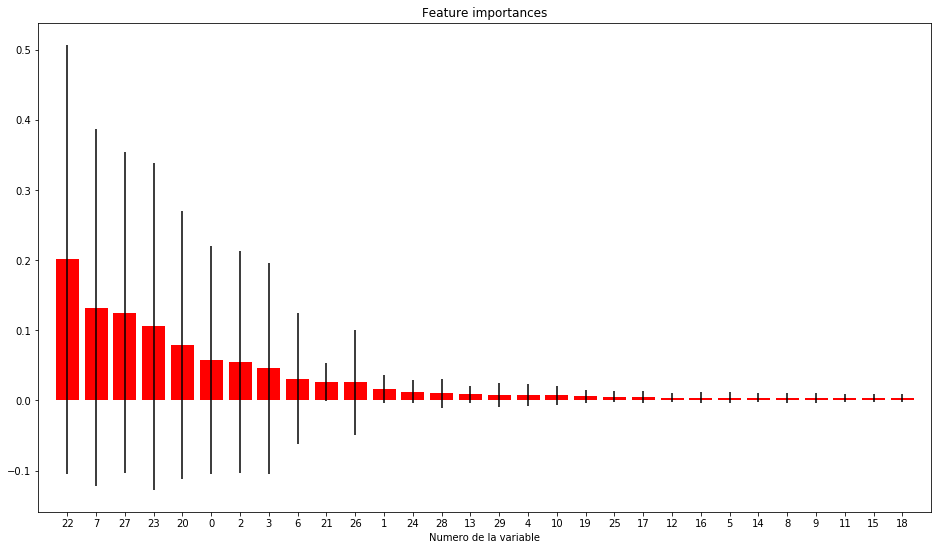

In [51]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

forest.fit(X,y)
features_importance(forest)

L'importance de chaque variable est plus mince qu'avec nos données synthétiques. Tout d'abord, l'écart entre données significatives et données insignifiantes est plus compliquée à déterminer, il nécéssitera d'imposer un seuil. Je n'ai pas trouvé la correspondance entre le numéro de la variable et ce qu'elle mesurait, cela aurait été intéréssant à mettre en avant.
On voit également une différence sur l'écart type. En effet, dans l'exemple précédent, il était beaucoup plus faible. Ici l'écart type est beaucoup plus fort.